In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from kmer_sort import launch_method_2


FILES = ["data/ecoli_100Kb_reads_5x.fasta",
        "data/ecoli_100Kb_reads_10x.fasta",
        "data/ecoli_100Kb_reads_20x.fasta",
        "data/ecoli_100Kb_reads_40x.fasta",
        "data/ecoli_100Kb_reads_80x.fasta",
        "data/ecoli_100Kb_reads_120x.fasta",]
file_size = [file[23:-6] for file in FILES]
KMER_SIZE = [2,3,4,5,6,7,8,9,10]

In [7]:
random_rate_best_size = []
random_ram_best_size = []
random_time_best_size = []

for file in FILES:
    kwargs = {
    "input":file,
    "output":"data/method_2_out.fasta",
    "delete_output":True,
    "method":"random",
    "size":6,
    }
    log = launch_method_2(**kwargs)
    random_rate_best_size.append(float(log["rate"]))
    try:
        random_ram_best_size.append(int(log["mem_usage"][0])/100)
    except IndexError:
        print(log)
        a=input("...waiting...")
    random_time_best_size.append(log["exec_time"])

random_rate_best_file = []
random_ram_best_file = []
random_time_best_file = []

for size in KMER_SIZE:
    kwargs = {
    "input":"data/ecoli_100Kb_reads_120x.fasta",
    "output":"data/method_2_out.fasta",
    "delete_output":True,
    "method":"random",
    "size":size,
    }
    log = launch_method_2(**kwargs)
    random_rate_best_file.append(float(log["rate"]))
    try:
        random_ram_best_file.append(int(log["mem_usage"][0])/100)
    except IndexError:
        print(log)
        a=input("...waiting...")
    random_time_best_file.append(log["exec_time"])
    
random_rate_worst_size = []
random_ram_worst_size = []
random_time_worst_size = []

for file in FILES:
    kwargs = {
    "input":file,
    "output":"data/method_2_out.fasta",
    "delete_output":True,
    "method":"random",
    "size":2,
    }
    log = launch_method_2(**kwargs)
    random_rate_worst_size.append(float(log["rate"]))
    try:
        random_ram_worst_size.append(int(log["mem_usage"][0])/100)
    except IndexError:
        print(log)
        a=input("...waiting...")
    random_time_worst_size.append(log["exec_time"])

random_rate_worst_file = []
random_ram_worst_file = []
random_time_worst_file = []

for size in KMER_SIZE:
    kwargs = {
    "input":"data/ecoli_100Kb_reads_5x.fasta",
    "output":"data/method_2_out.fasta",
    "delete_output":True,
    "method":"random",
    "size":size,
    }
    log = launch_method_2(**kwargs)
    random_rate_worst_file.append(float(log["rate"]))
    try:
        random_ram_worst_file.append(int(log["mem_usage"][0])/100)
    except IndexError:
        print(log)
        a=input("...waiting...")
    random_time_worst_file.append(log["exec_time"])

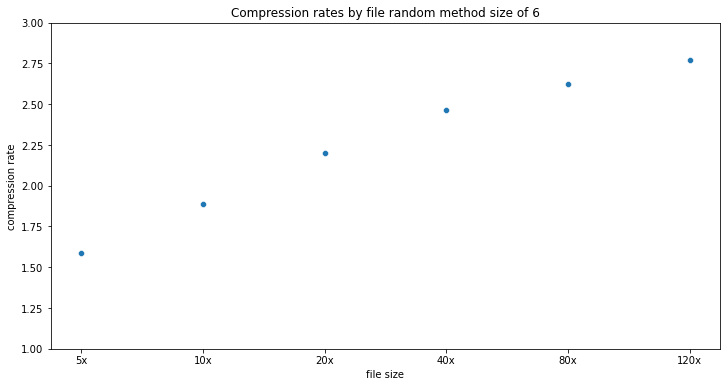

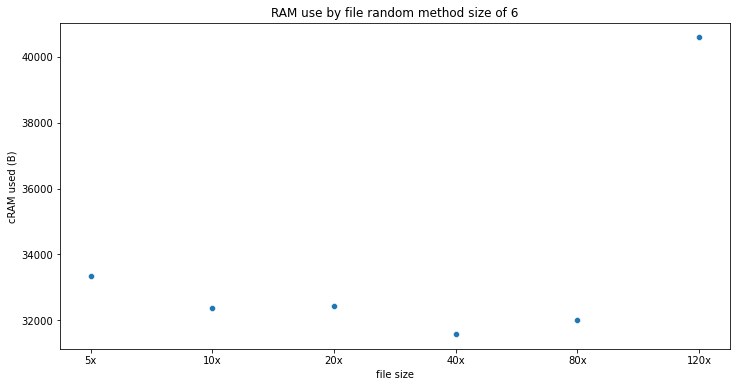

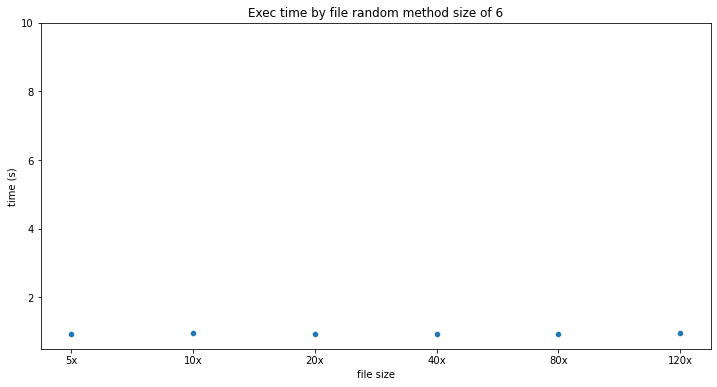

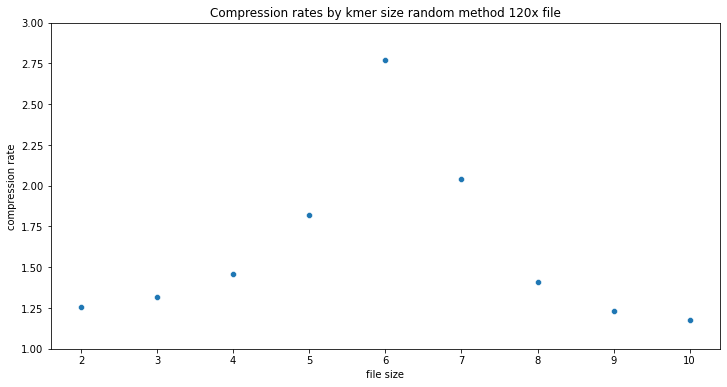

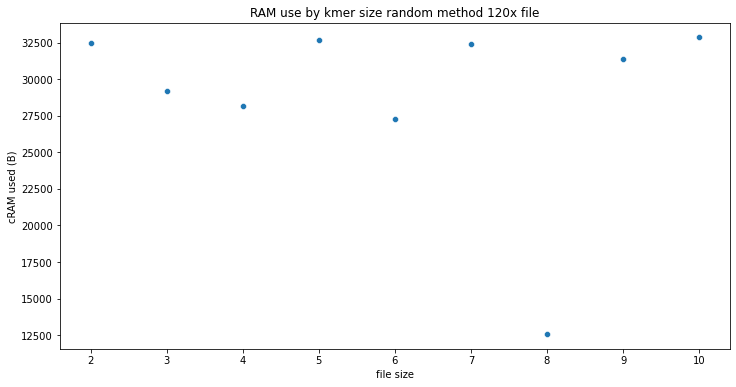

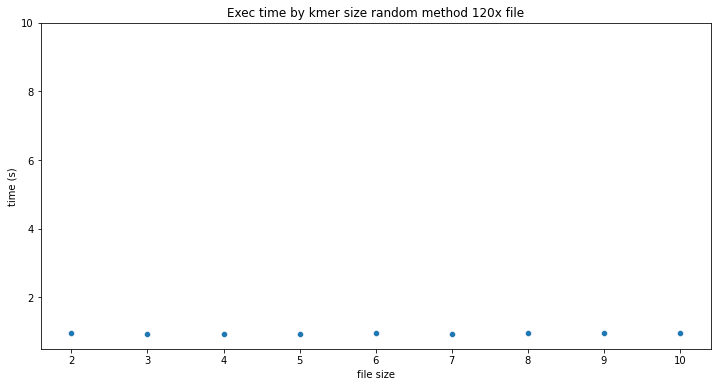

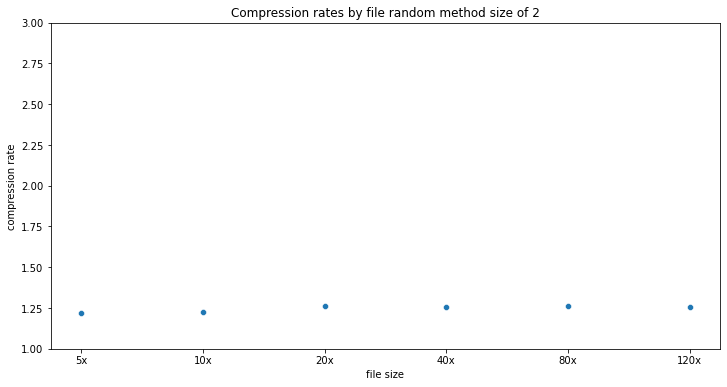

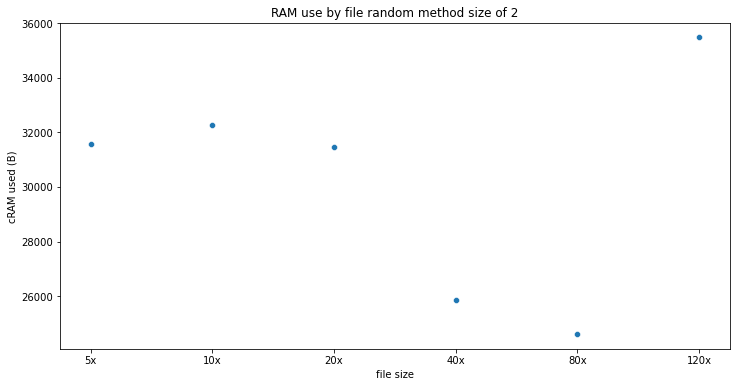

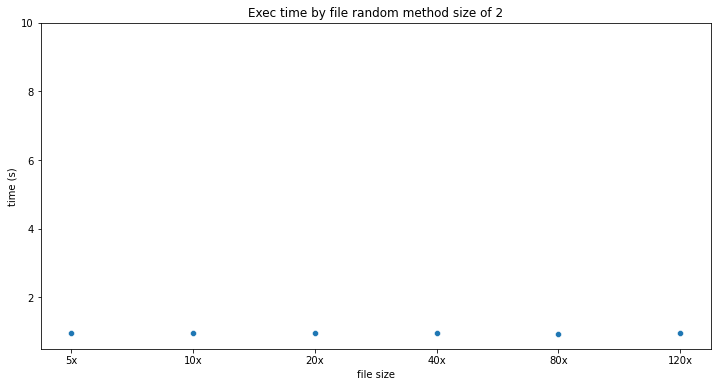

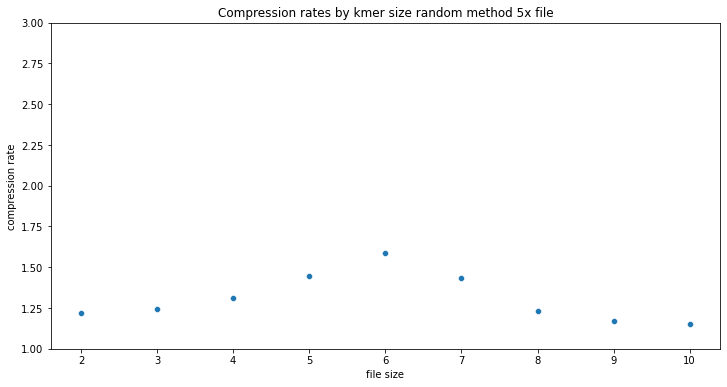

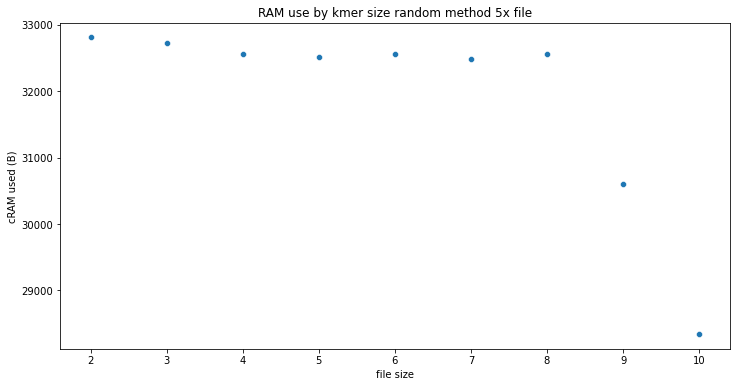

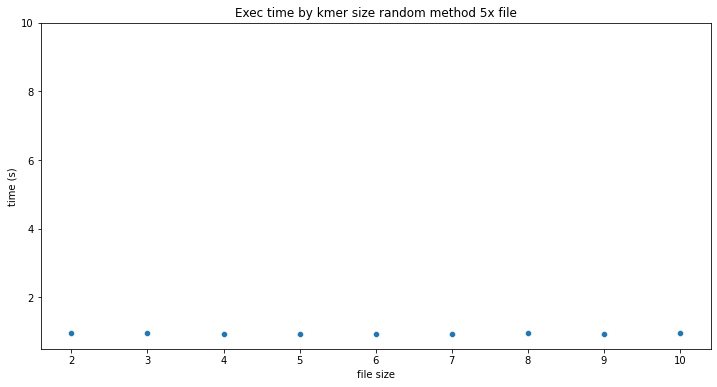

In [8]:
plt.figure(figsize=(12,6))
plt.ylim(1, 3)
size_comparisons= sns.scatterplot(
    x=file_size, y=random_rate_best_size,
    legend="brief",
).set(title="Compression rates by file random method size of 6"
      ,xlabel="file size", ylabel="compression rate")


plt.figure(figsize=(12,6))
size_comparisons= sns.scatterplot(
    x=file_size, y=random_ram_best_size,
    legend="brief",
).set(title="RAM use by file random method size of 6"
      ,xlabel="file size", ylabel="cRAM used (B)")

plt.figure(figsize=(12,6))
plt.ylim(0.5, 10)
size_comparisons= sns.scatterplot(
    x=file_size, y=random_time_best_size,
    legend="brief",
).set(title="Exec time by file random method size of 6"
      ,xlabel="file size", ylabel="time (s)")

plt.figure(figsize=(12,6))
plt.ylim(1, 3)
size_comparisons= sns.scatterplot(
    x=KMER_SIZE, y=random_rate_best_file,
    legend="brief",
).set(title="Compression rates by kmer size random method 120x file"
      ,xlabel="file size", ylabel="compression rate")

plt.figure(figsize=(12,6))
size_comparisons= sns.scatterplot(
    x=KMER_SIZE, y=random_ram_best_file,
    legend="brief",
).set(title="RAM use by kmer size random method 120x file"
      ,xlabel="file size", ylabel="cRAM used (B)")

plt.figure(figsize=(12,6))
plt.ylim(0.5, 10)
size_comparisons= sns.scatterplot(
    x=KMER_SIZE, y=random_time_best_file,
    legend="brief",
).set(title="Exec time by kmer size random method 120x file"
      ,xlabel="file size", ylabel="time (s)")

plt.figure(figsize=(12,6))
plt.ylim(1, 3)
size_comparisons= sns.scatterplot(
    x=file_size, y=random_rate_worst_size,
    legend="brief",
).set(title="Compression rates by file random method size of 2"
      ,xlabel="file size", ylabel="compression rate")


plt.figure(figsize=(12,6))
size_comparisons= sns.scatterplot(
    x=file_size, y=random_ram_worst_size,
    legend="brief",
).set(title="RAM use by file random method size of 2"
      ,xlabel="file size", ylabel="cRAM used (B)")

plt.figure(figsize=(12,6))
plt.ylim(0.5, 10)
size_comparisons= sns.scatterplot(
    x=file_size, y=random_time_worst_size,
    legend="brief",
).set(title="Exec time by file random method size of 2"
      ,xlabel="file size", ylabel="time (s)")

plt.figure(figsize=(12,6))
plt.ylim(1, 3)
size_comparisons= sns.scatterplot(
    x=KMER_SIZE, y=random_rate_worst_file,
    legend="brief",
).set(title="Compression rates by kmer size random method 5x file"
      ,xlabel="file size", ylabel="compression rate")

plt.figure(figsize=(12,6))
size_comparisons= sns.scatterplot(
    x=KMER_SIZE, y=random_ram_worst_file,
    legend="brief",
).set(title="RAM use by kmer size random method 5x file"
      ,xlabel="file size", ylabel="cRAM used (B)")

plt.figure(figsize=(12,6))
plt.ylim(0.5, 10)
size_comparisons= sns.scatterplot(
    x=KMER_SIZE, y=random_time_worst_file,
    legend="brief",
).set(title="Exec time by kmer size random method 5x file"
      ,xlabel="file size", ylabel="time (s)")

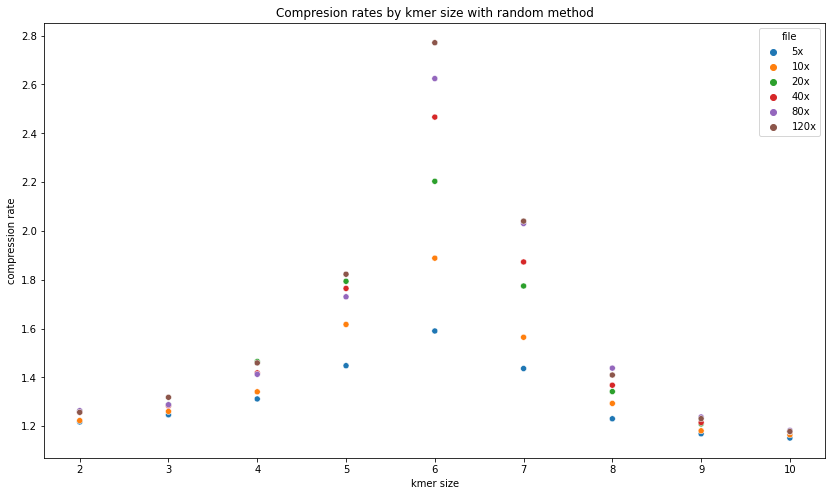

In [38]:
import pandas as pd

df = pd.DataFrame(pd.read_csv("metrics_random.csv",sep=";"))
df
plt.figure(figsize=(14,8))
one_two= sns.scatterplot(
    x="kmer size",y="compression rate",
    data=df,
    hue="file",
    legend="brief",
).set(title="Compresion rates by kmer size with random method")
            